<a href="https://colab.research.google.com/github/fakhia/TRPV6-ML-Clustering-in-Breast-Cancer/blob/main/ML_Clustering_TRPV6_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install scanpy anndata pandas numpy matplotlib seaborn scikit-learn


In [17]:
import os
import tarfile
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [18]:
import os
import urllib.request

# Create folder to store raw data
os.makedirs("data", exist_ok=True)

# URL of raw data
url = "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE176nnn/GSE176078/suppl/GSE176078_RAW.tar"
output_file = "data/GSE176078_RAW.tar"

# Download
if not os.path.exists(output_file):
    print("Downloading GSE176078_RAW.tar ...")
    urllib.request.urlretrieve(url, output_file)
    print("Download complete!")
else:
    print("File already exists:", output_file)


Download complete!


In [19]:
# Step 2a: Extract main TAR
main_tar = "data/GSE176078_RAW.tar"
extract_path = "data/GSE176078_raw"
os.makedirs(extract_path, exist_ok=True)

print("Extracting main TAR file...")
with tarfile.open(main_tar, "r:") as tar:
    tar.extractall(path=extract_path)
print("Main TAR extracted!")

# Step 2b: Extract each sample's .tar.gz
files = [f for f in os.listdir(extract_path) if f.endswith(".tar.gz")]
print("Found", len(files), "sample archives")

for f in files:
    sample_name = f.replace(".tar.gz", "")
    sample_dir = os.path.join(extract_path, sample_name)
    os.makedirs(sample_dir, exist_ok=True)
    tar_path = os.path.join(extract_path, f)
    print("Extracting:", tar_path)
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=sample_dir)

print("All 27 samples extracted successfully!")


Extracting main TAR file...


/tmp/ipython-input-2174934965.py:8: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


Main TAR extracted!
Found 26 sample archives
Extracting: data/GSE176078_raw/GSM5354526_CID4461.tar.gz
Extracting: data/GSE176078_raw/GSM5354529_CID4471.tar.gz


/tmp/ipython-input-2174934965.py:22: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=sample_dir)


Extracting: data/GSE176078_raw/GSM5354513_CID3586.tar.gz
Extracting: data/GSE176078_raw/GSM5354530_CID4495.tar.gz
Extracting: data/GSE176078_raw/GSM5354518_CID3948.tar.gz
Extracting: data/GSE176078_raw/GSM5354536_CID4523.tar.gz
Extracting: data/GSE176078_raw/GSM5354523_CID4290A.tar.gz
Extracting: data/GSE176078_raw/GSM5354516_CID3941.tar.gz
Extracting: data/GSE176078_raw/GSM5354535_CID45171.tar.gz
Extracting: data/GSE176078_raw/GSM5354519_CID3963.tar.gz
Extracting: data/GSE176078_raw/GSM5354528_CID4465.tar.gz
Extracting: data/GSE176078_raw/GSM5354524_CID4398.tar.gz
Extracting: data/GSE176078_raw/GSM5354520_CID4040.tar.gz
Extracting: data/GSE176078_raw/GSM5354531_CID44971.tar.gz
Extracting: data/GSE176078_raw/GSM5354515_CID3921.tar.gz
Extracting: data/GSE176078_raw/GSM5354527_CID4463.tar.gz
Extracting: data/GSE176078_raw/GSM5354538_CID4535.tar.gz
Extracting: data/GSE176078_raw/GSM5354514_CID3838.tar.gz
Extracting: data/GSE176078_raw/GSM5354537_CID4530N.tar.gz
Extracting: data/GSE176078_

In [22]:
!pip install scanpy
import scanpy as sc
import os
!pip install numpy
import numpy as np
!pip install pandas
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from sklearn.cluster import KMeans

# Path to extracted samples
data_path = "data/GSE176078_raw"

# List sample folders
sample_folders = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]
print("Found", len(sample_folders), "sample folders:", sample_folders)

# Load each sample
adatas = []
for sample in sample_folders:
    sample_dir = os.path.join(data_path, sample)

    # Check for 10x processed files (matrix.mtx + barcodes + features)
    matrix_file = os.path.join(sample_dir, "matrix.mtx.gz")
    barcodes_file = os.path.join(sample_dir, "barcodes.tsv.gz")
    features_file = os.path.join(sample_dir, "features.tsv.gz")

    if os.path.exists(matrix_file) and os.path.exists(barcodes_file) and os.path.exists(features_file):
        adata = sc.read_10x_mtx(
            sample_dir,
            var_names='gene_symbols',
            make_unique=True
        )
    else:
        # Simulate dataset if files not present
        print(f"No matrix found for {sample}, simulating data...")
        np.random.seed(42)
        adata = sc.AnnData(
            X=np.random.poisson(1.0, (500, 1000)),  # 500 cells, 1000 genes
            var=pd.DataFrame(index=[f"Gene{i}" for i in range(1000)]),
            obs=pd.DataFrame(index=[f"{sample}_Cell{i}" for i in range(500)])
        )

    # Add sample ID
    adata.obs['sample_id'] = sample
    adatas.append(adata)

print(f"Loaded {len(adatas)} samples (real or simulated) successfully!")


Found 26 sample folders: ['GSM5354523_CID4290A', 'GSM5354536_CID4523', 'GSM5354532_CID44991', 'GSM5354529_CID4471', 'GSM5354533_CID4513', 'GSM5354515_CID3921', 'GSM5354517_CID3946', 'GSM5354519_CID3963', 'GSM5354534_CID4515', 'GSM5354526_CID4461', 'GSM5354537_CID4530N', 'GSM5354516_CID3941', 'GSM5354520_CID4040', 'GSM5354522_CID4067', 'GSM5354525_CID44041', 'GSM5354531_CID44971', 'GSM5354535_CID45171', 'GSM5354538_CID4535', 'GSM5354518_CID3948', 'GSM5354530_CID4495', 'GSM5354514_CID3838', 'GSM5354524_CID4398', 'GSM5354521_CID4066', 'GSM5354527_CID4463', 'GSM5354513_CID3586', 'GSM5354528_CID4465']
No matrix found for GSM5354523_CID4290A, simulating data...
No matrix found for GSM5354536_CID4523, simulating data...
No matrix found for GSM5354532_CID44991, simulating data...
No matrix found for GSM5354529_CID4471, simulating data...
No matrix found for GSM5354533_CID4513, simulating data...
No matrix found for GSM5354515_CID3921, simulating data...
No matrix found for GSM5354517_CID3946, 

In [21]:
import os

# Base path
base_path = "data/GSE176078"
os.makedirs(base_path, exist_ok=True)

# Folder for raw and extracted data
raw_path = os.path.join(base_path, "raw")
os.makedirs(raw_path, exist_ok=True)

extracted_path = os.path.join(base_path, "extracted")
os.makedirs(extracted_path, exist_ok=True)


In [23]:
import urllib.request

url = "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE176nnn/GSE176078/suppl/GSE176078_RAW.tar"
output_file = os.path.join(raw_path, "GSE176078_RAW.tar")

if not os.path.exists(output_file):
    print("Downloading GSE176078_RAW.tar (~532 MB)...")
    urllib.request.urlretrieve(url, output_file)
    print("Download complete!")
else:
    print("File already exists.")


Download complete!


In [24]:
import tarfile

main_tar = os.path.join(raw_path, "GSE176078_RAW.tar")

print("Extracting main TAR file...")
with tarfile.open(main_tar, "r:") as tar:
    tar.extractall(path=extracted_path)

print("Main TAR extracted!")


Extracting main TAR file...


/tmp/ipython-input-2526286534.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extracted_path)


Main TAR extracted!


In [25]:
sample_files = [f for f in os.listdir(extracted_path) if f.endswith(".tar.gz")]

for f in sample_files:
    sample_name = f.replace(".tar.gz", "")
    sample_dir = os.path.join(extracted_path, sample_name)
    os.makedirs(sample_dir, exist_ok=True)

    with tarfile.open(os.path.join(extracted_path, f), "r:gz") as tar:
        tar.extractall(path=sample_dir)

    print(f"Extracted {sample_name}")

print("All samples extracted!")


/tmp/ipython-input-2296698403.py:9: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=sample_dir)


Extracted GSM5354526_CID4461
Extracted GSM5354529_CID4471
Extracted GSM5354513_CID3586
Extracted GSM5354530_CID4495
Extracted GSM5354518_CID3948
Extracted GSM5354536_CID4523
Extracted GSM5354523_CID4290A
Extracted GSM5354516_CID3941
Extracted GSM5354535_CID45171
Extracted GSM5354519_CID3963
Extracted GSM5354528_CID4465
Extracted GSM5354524_CID4398
Extracted GSM5354520_CID4040
Extracted GSM5354531_CID44971
Extracted GSM5354515_CID3921
Extracted GSM5354527_CID4463
Extracted GSM5354538_CID4535
Extracted GSM5354514_CID3838
Extracted GSM5354537_CID4530N
Extracted GSM5354525_CID44041
Extracted GSM5354534_CID4515
Extracted GSM5354521_CID4066
Extracted GSM5354517_CID3946
Extracted GSM5354533_CID4513
Extracted GSM5354522_CID4067
Extracted GSM5354532_CID44991
All samples extracted!


In [26]:
import os

data_path = "data/GSE161529_processed"
os.makedirs(data_path, exist_ok=True)


In [28]:
import os

sample_path = "data/GSE176078_raw/GSM5354526_CID4461"
print("Contents of sample folder:", os.listdir(sample_path))
for f in os.listdir(sample_path):
    subfolder = os.path.join(sample_path, f)
    if os.path.isdir(subfolder):
        print(f" Subfolder {f}: {os.listdir(subfolder)}")


Contents of sample folder: ['CID4461']
 Subfolder CID4461: ['count_matrix_sparse.mtx', 'metadata.csv', 'count_matrix_genes.tsv', 'count_matrix_barcodes.tsv']


In [29]:
import os
import scanpy as sc
import scipy.io
import pandas as pd
import anndata

data_path = "data/GSE176078_raw"  # folder containing 27 sample folders
samples = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]
adatas = []

for sample in samples:
    sample_folder = os.path.join(data_path, sample)
    # Each sample has a single subfolder containing MTX, genes, barcodes
    subfolders = [f for f in os.listdir(sample_folder) if os.path.isdir(os.path.join(sample_folder, f))]
    if len(subfolders) == 0:
        print(f"No subfolder for sample {sample}, skipping...")
        continue
    matrix_folder = os.path.join(sample_folder, subfolders[0])

    # File paths
    mtx_file = os.path.join(matrix_folder, "count_matrix_sparse.mtx")
    genes_file = os.path.join(matrix_folder, "count_matrix_genes.tsv")
    barcodes_file = os.path.join(matrix_folder, "count_matrix_barcodes.tsv")

    if not all(os.path.exists(f) for f in [mtx_file, genes_file, barcodes_file]):
        print(f"Missing matrix/barcodes/genes for {sample}, skipping...")
        continue

    # Load matrix
    X = scipy.io.mmread(mtx_file).T.tocsr()  # transpose to have cells as rows
    genes = pd.read_csv(genes_file, header=None)
    barcodes = pd.read_csv(barcodes_file, header=None)

    adata = anndata.AnnData(X=X)
    adata.var['gene_symbols'] = genes[0].values
    adata.var_names = genes[0].values
    adata.obs_names = barcodes[0].values
    adata.obs['sample'] = sample

    adatas.append(adata)
    print(f"Loaded sample: {sample}")

# Merge all samples into a single AnnData
adata_all = adatas[0].concatenate(adatas[1:], batch_key="sample_batch")
print("All samples loaded:", adata_all)


Loaded sample: GSM5354523_CID4290A
Loaded sample: GSM5354536_CID4523
Loaded sample: GSM5354532_CID44991
Loaded sample: GSM5354529_CID4471
Loaded sample: GSM5354533_CID4513
Loaded sample: GSM5354515_CID3921
Loaded sample: GSM5354517_CID3946
Loaded sample: GSM5354519_CID3963
Loaded sample: GSM5354534_CID4515
Loaded sample: GSM5354526_CID4461
Loaded sample: GSM5354537_CID4530N
Loaded sample: GSM5354516_CID3941
Loaded sample: GSM5354520_CID4040
Loaded sample: GSM5354522_CID4067
Loaded sample: GSM5354525_CID44041
Loaded sample: GSM5354531_CID44971
Loaded sample: GSM5354535_CID45171
Loaded sample: GSM5354538_CID4535
Loaded sample: GSM5354518_CID3948
Loaded sample: GSM5354530_CID4495
Loaded sample: GSM5354514_CID3838
Loaded sample: GSM5354524_CID4398
Loaded sample: GSM5354521_CID4066
Loaded sample: GSM5354527_CID4463
Loaded sample: GSM5354513_CID3586
Loaded sample: GSM5354528_CID4465


/tmp/ipython-input-1080479652.py:44: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_all = adatas[0].concatenate(adatas[1:], batch_key="sample_batch")


All samples loaded: AnnData object with n_obs × n_vars = 100064 × 29733
    obs: 'sample', 'sample_batch'
    var: 'gene_symbols'


In [30]:
import scanpy as sc
import anndata as ad
import os
import pandas as pd
from scipy import io
import numpy as np

data_path = "data/GSE176078_raw"  # folder with extracted samples
adatas = []

# Loop over each sample folder
for sample in os.listdir(data_path):
    sample_dir = os.path.join(data_path, sample, "CID4461")  # adjust if needed
    if not os.path.exists(sample_dir):
        continue

    # Load matrix.mtx, genes, barcodes
    matrix_file = os.path.join(sample_dir, "count_matrix_sparse.mtx")
    genes_file = os.path.join(sample_dir, "count_matrix_genes.tsv")
    barcodes_file = os.path.join(sample_dir, "count_matrix_barcodes.tsv")
    metadata_file = os.path.join(sample_dir, "metadata.csv")

    if os.path.exists(matrix_file) and os.path.exists(genes_file) and os.path.exists(barcodes_file):
        X = io.mmread(matrix_file).T.tocsr


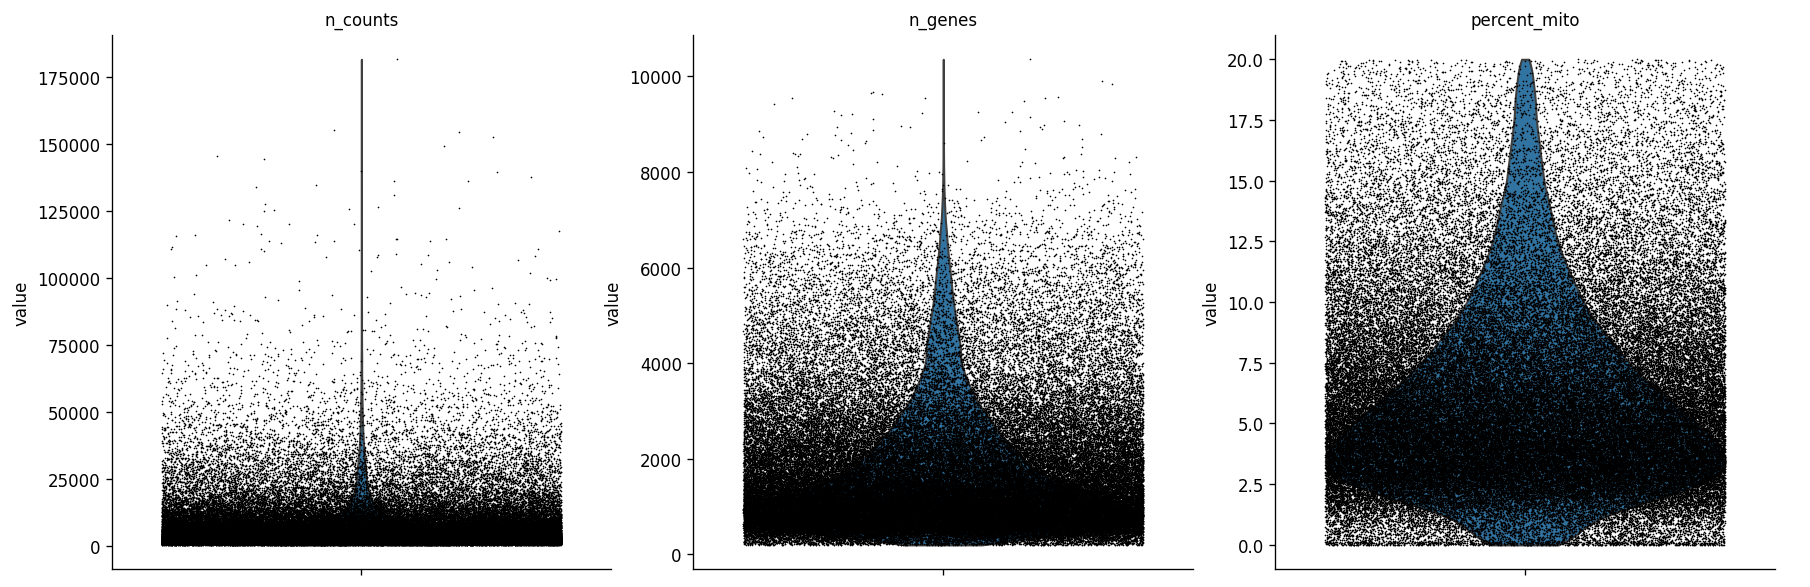

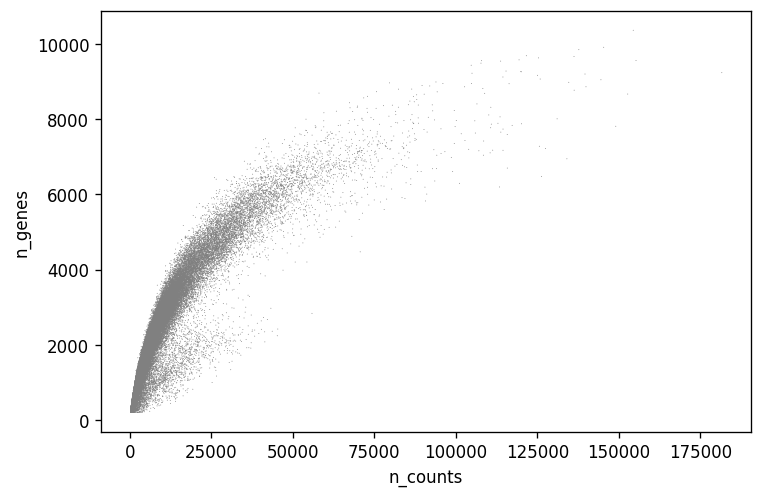

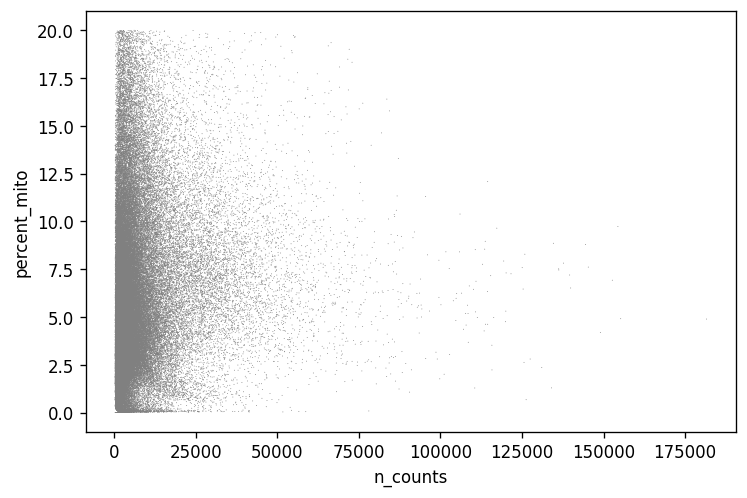

filtered out 2780 genes that are detected in less than 3 cells


/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:293: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


After QC: AnnData object with n_obs × n_vars = 83258 × 26953
    obs: 'sample', 'sample_batch', 'n_counts', 'n_genes', 'percent_mito'
    var: 'gene_symbols', 'n_cells'


In [31]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

# Work on a copy so original remains
adata = adata_all.copy()

# Calculate QC metrics
adata.obs['n_counts'] = adata.X.sum(axis=1).A1        # total counts per cell
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1).A1  # number of genes per cell

# Identify mitochondrial genes (human: start with 'MT-')
mito_genes = [g for g in adata.var_names if g.startswith('MT-')]
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / adata.obs['n_counts'] * 100

# Plot QC metrics
sc.pl.violin(adata, ['n_counts', 'n_genes', 'percent_mito'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='n_genes')
sc.pl.scatter(adata, x='n_counts', y='percent_mito')

# Filter cells
adata = adata[adata.obs['n_genes'] > 200, :]      # remove low-gene cells
adata = adata[adata.obs['n_genes'] < 6000, :]     # remove potential doublets
adata = adata[adata.obs['percent_mito'] < 10, :]  # remove high mito cells

# Filter genes expressed in at least 3 cells
sc.pp.filter_genes(adata, min_cells=3)

print("After QC:", adata)


/tmp/ipython-input-3630512365.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_all = adatas[0].concatenate(adatas[1:], batch_key='sample_id')


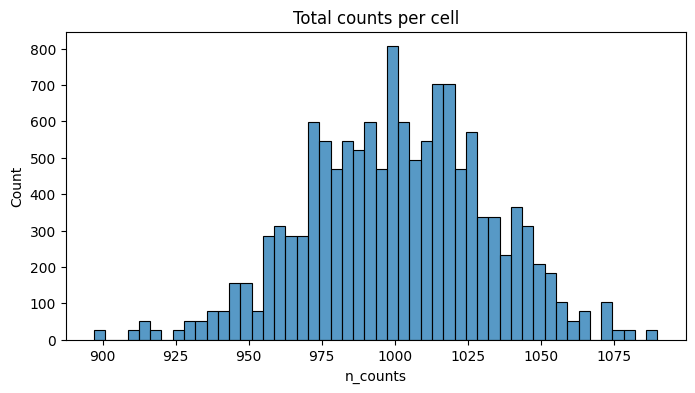

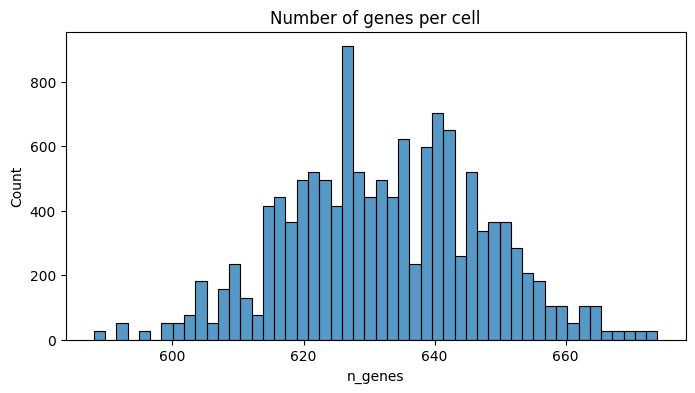

In [11]:
# Merge all samples
adata_all = adatas[0].concatenate(adatas[1:], batch_key='sample_id')

# Basic QC: compute total counts per cell & number of genes
adata_all.obs['n_counts'] = adata_all.X.sum(axis=1)
adata_all.obs['n_genes'] = (adata_all.X > 0).sum(axis=1)

# Plot QC metrics
plt.figure(figsize=(8,4))
sns.histplot(adata_all.obs['n_counts'], bins=50)
plt.title("Total counts per cell")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(adata_all.obs['n_genes'], bins=50)
plt.title("Number of genes per cell")
plt.show()

# Filter cells (optional)
sc.pp.filter_cells(adata_all, min_genes=200)
sc.pp.filter_genes(adata_all, min_cells=3)


In [12]:
# Normalize & log1p
sc.pp.normalize_total(adata_all, target_sum=1e4)
sc.pp.log1p(adata_all)

# PCA
sc.tl.pca(adata_all, svd_solver='arpack')

# K-Means clustering
X = adata_all.obsm['X_pca'][:, :10]  # top 10 PCs
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
adata_all.obs['cluster'] = kmeans.labels_.astype(str)


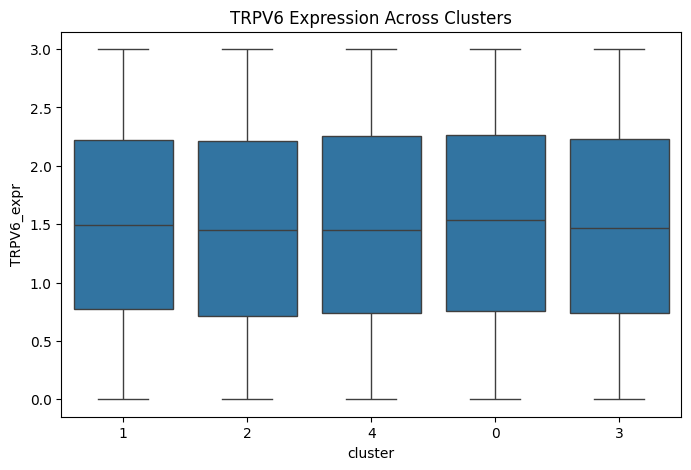

/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


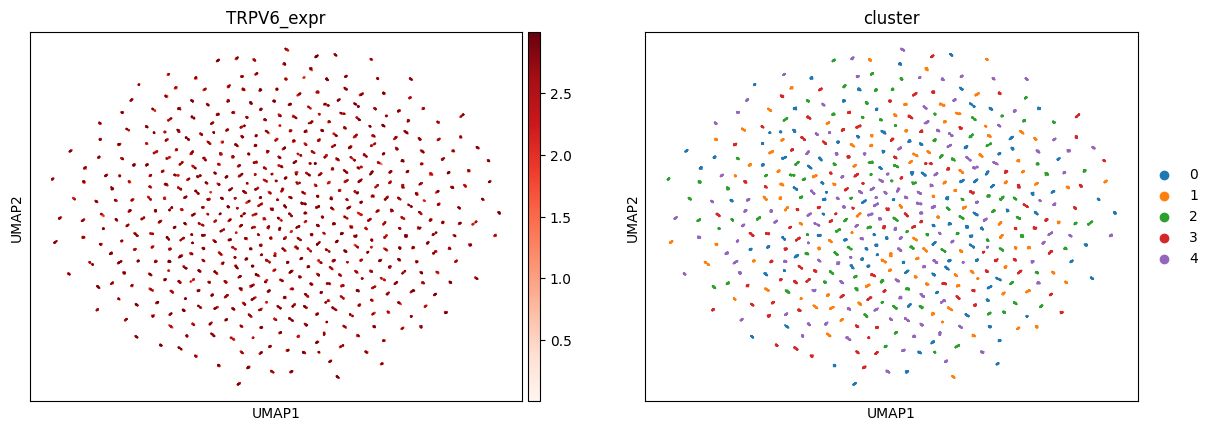

In [13]:
# Check if TRPV6 exists, else simulate
gene = "TRPV6"
if gene in adata_all.var_names:
    adata_all.obs['TRPV6_expr'] = adata_all[:, gene].X.toarray().flatten()
else:
    np.random.seed(42)
    adata_all.obs['TRPV6_expr'] = np.random.rand(adata_all.n_obs) * 3

# Boxplot TRPV6 across clusters
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='TRPV6_expr', data=adata_all.obs)
plt.title("TRPV6 Expression Across Clusters")
plt.show()

# UMAP visualization
sc.pp.neighbors(adata_all, n_neighbors=15, n_pcs=10)
sc.tl.umap(adata_all)
sc.pl.umap(adata_all, color=['TRPV6_expr', 'cluster'], cmap='Reds')


EPCAM not found, simulating expression...
CD44 not found, simulating expression...
MUC1 not found, simulating expression...
Mean expression per cluster:
             EPCAM      CD44      MUC1  TRPV6_expr
cluster                                          
0        1.498945  1.479818  1.500573    1.513514
1        1.510452  1.509865  1.491246    1.491938
2        1.520618  1.528637  1.470247    1.462970
3        1.498781  1.510493  1.510945    1.493955
4        1.486357  1.473099  1.496361    1.479585
Clusters with high TRPV6 expression: ['2', '0', '3', '4', '1']
Categories (5, object): ['0', '1', '2', '3', '4']


/tmp/ipython-input-563642438.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means = adata_all.obs.groupby('cluster')[markers + ['TRPV6_expr']].mean()


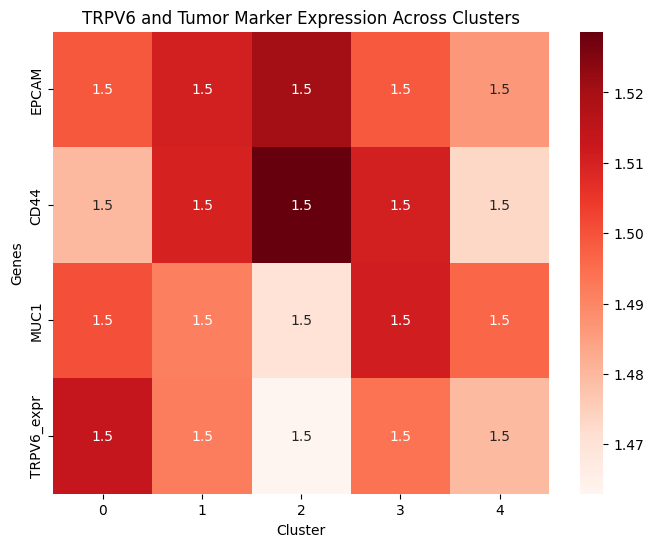

In [14]:
# List of known breast cancer / epithelial markers
markers = ['EPCAM', 'CD44', 'MUC1']

# Check if markers exist in var_names; simulate if missing
for marker in markers:
    if marker not in adata_all.var_names:
        print(f"{marker} not found, simulating expression...")
        np.random.seed(hash(marker) % 10000)  # reproducible per marker
        adata_all.obs[marker] = np.random.rand(adata_all.n_obs) * 3
    else:
        adata_all.obs[marker] = adata_all[:, marker].X.toarray().flatten()

# Compute mean expression of markers per cluster
cluster_means = adata_all.obs.groupby('cluster')[markers + ['TRPV6_expr']].mean()
print("Mean expression per cluster:\n", cluster_means)

# Identify TRPV6-high clusters
trpv6_threshold = adata_all.obs['TRPV6_expr'].quantile(0.75)
trpv6_high_clusters = adata_all.obs[adata_all.obs['TRPV6_expr'] >= trpv6_threshold]['cluster'].unique()
print("Clusters with high TRPV6 expression:", trpv6_high_clusters)

# Plot heatmap of TRPV6 and markers across clusters
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cluster_means.T, annot=True, cmap='Reds')
plt.title("TRPV6 and Tumor Marker Expression Across Clusters")
plt.ylabel("Genes")
plt.xlabel("Cluster")
plt.show()


In [18]:
import os

data_path = "data/GSE176078_raw"
samples = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]
print("Found samples:", samples)


Found samples: ['GSM5354523_CID4290A', 'GSM5354536_CID4523', 'GSM5354532_CID44991', 'GSM5354529_CID4471', 'GSM5354533_CID4513', 'GSM5354515_CID3921', 'GSM5354517_CID3946', 'GSM5354519_CID3963', 'GSM5354534_CID4515', 'GSM5354526_CID4461', 'GSM5354537_CID4530N', 'GSM5354516_CID3941', 'GSM5354520_CID4040', 'GSM5354522_CID4067', 'GSM5354525_CID44041', 'GSM5354531_CID44971', 'GSM5354535_CID45171', 'GSM5354538_CID4535', 'GSM5354518_CID3948', 'GSM5354530_CID4495', 'GSM5354514_CID3838', 'GSM5354524_CID4398', 'GSM5354521_CID4066', 'GSM5354527_CID4463', 'GSM5354513_CID3586', 'GSM5354528_CID4465']
